# Fender Apron Defects Tracking AI

### First making the training data. Converting the images into grayscale and resizing them to 500x500 so that computations doesn't take forever.

(3120, 4160)


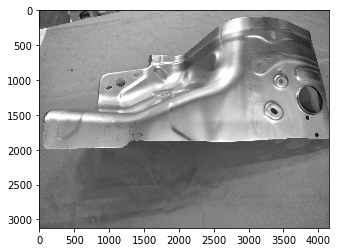

In [33]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# DATADIR = "/home/tejasreddyk/Documents/YE358311_Fender_apron"
DATADIR = os.getcwd()
CATEGORIES = ["YE358311_defects/YE358311_Crack_and_Wrinkle_defect","YE358311_Healthy"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        print(img_array.shape)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
        
    break
        


In [34]:
IMG_SIZE = 500

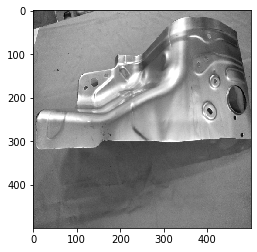

In [35]:
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [36]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)    # defects or healthy

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
        
create_training_data()
        

In [37]:
print(len(training_data))    # 111 defected + 139 healthy

250


### Must shuffle the data to mingle both defected and healthy images.

In [38]:
import random
random.shuffle(training_data)

In [39]:
for sample in training_data[:10]:
    print(sample[1])
    

1
1
1
1
0
0
0
0
0
1


### X : Features
### y : Labels

In [40]:
X = []
y = []

In [41]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   # change 1 to 3 for non-grayscale

### Let's pickle them to save and use later.

In [42]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()




### Import Keras libraries with Tensorflow backend and load pickled data.

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))


In [44]:
X = X/255.0       # Normalize
X.shape

(250, 500, 500, 1)

### Let's build the Model. It's a sequential Keras model using 2D Convolutional Neural Network layers. Pooling layers an Dropouts are added. Dense layer uses 1D parameters, so we need to Flatten before sending into it.

In [45]:
model = Sequential()


# block 1
model.add( Conv2D(32, (3,3), input_shape = X.shape[1:]) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


#block 2
model.add( Conv2D(32, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


#block 3
model.add( Conv2D(32, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


#block 4
model.add( Conv2D(32, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


#block 5
model.add( Conv2D(32, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


#block 6
model.add( Conv2D(64, (3,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(64))

model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics = ["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 498, 498, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 247, 247, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 32)      9248      
__________

### Training on very less data like 100 samples might not lead to greater accuracy but transfer learning can be used to increase the data and predict accordingly

In [46]:
model.fit(X, y, batch_size=16, epochs=25, validation_split=0.6)

Train on 100 samples, validate on 150 samples
Epoch 1/25
100/100 [==============================] - 44s 438ms/sample - loss: 0.9516 - acc: 0.5600 - val_loss: 0.6870 - val_acc: 0.5667
Epoch 2/25
100/100 [==============================] - 26s 260ms/sample - loss: 0.6948 - acc: 0.5400 - val_loss: 0.6994 - val_acc: 0.4333
Epoch 3/25
100/100 [==============================] - 27s 270ms/sample - loss: 0.6959 - acc: 0.4800 - val_loss: 0.6873 - val_acc: 0.5667
Epoch 4/25
100/100 [==============================] - 26s 261ms/sample - loss: 0.6962 - acc: 0.5400 - val_loss: 0.6946 - val_acc: 0.4333
Epoch 5/25
100/100 [==============================] - 26s 258ms/sample - loss: 0.6954 - acc: 0.5400 - val_loss: 0.6878 - val_acc: 0.5667
Epoch 6/25
100/100 [==============================] - 26s 258ms/sample - loss: 0.6902 - acc: 0.5400 - val_loss: 0.6859 - val_acc: 0.5667
Epoch 7/25
100/100 [==============================] - 26s 256ms/sample - loss: 0.6936 - acc: 0.5400 - val_loss: 0.6841 - val_acc: 0.

### It went close to higher 70's many times, reached 80% here. Now let's save the keras model which can be later used.

In [47]:
model.save("FenderApronDefectModel.h5")   # This model is usable in mobile as we saved it. It can also be used as pre-trained model for other projects.

### For using in Mobile Phones, we need to convert the Keras model into Tensorflow Lite Model. It helps to use that model in Android studio, with Firebase backend.

In [48]:
converter = tf.lite.TFLiteConverter.from_keras_model_file("FenderApronDefectModel.h5")
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Froze 16 variables.
INFO:tensorflow:Converted 16 variables to const ops.


637460

### I tried to implement Transfer Learning using InceptionResNetV2. But unfortuately, it didnt work as I expected it to be. So, I've sticked to CNN.

In [49]:
# from keras import optimizers
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [50]:
# from keras.applications import InceptionResNetV2

# conv_base = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(150,150,3))

In [51]:
# from keras import applications
# from keras.preprocessing.image import ImageDataGenerator
# from keras import optimizers
# from keras.models import Sequential, Model 
# from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
# from keras import backend as k 
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [52]:
# nb_train_samples = 250
# nb_validation_samples = 200 
# batch_size = 16
# epochs = 50

# model2 = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, 3))

In [53]:
# train_data_dir = os.path.join(DATADIR, "data/train")
# validation_data_dir = os.path.join(DATADIR, "data/test")
# all_data_dir = os.path.join(DATADIR, "data/all")

In [54]:
# #Adding custom Layers 
# x = model2.output
# x = Flatten()(x)
# x = Dense(1024, activation="relu")(x)
# x = Dropout(0.5)(x)
# x = Dense(1024, activation="relu")(x)
# predictions = Dense(16, activation="softmax")(x)

# # creating the final model 
# model_final = Model(input = model2.input, output = predictions)

# # compile the model 
# model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


In [55]:
# # Initiate the train and test generators with data Augumentation 
# train_datagen = ImageDataGenerator(
#     rescale = 1./255,
#     horizontal_flip = True,
#     fill_mode = "nearest",
#     zoom_range = 0.3,
#     width_shift_range = 0.3,
#     height_shift_range=0.3,
#     rotation_range=30)

# test_datagen = ImageDataGenerator(
#     rescale = 1./255,
#     horizontal_flip = True,
#     fill_mode = "nearest",
#     zoom_range = 0.3,
#     width_shift_range = 0.3,
#     height_shift_range=0.3,
#     rotation_range=30)

In [56]:
# all_data = []

# for img in os.listdir(all_data_dir):
#     all_data.append(img)

# random.shuffle(all_data)

In [57]:
# from shutil import copyfile


# train_data = all_data[:200]
# test_data = all_data[200:]

# for image in train_data:
#     copyfile(os.path.join(all_data_dir, image), os.path.join(train_data_dir,image))
    
# for image in test_data:
#     copyfile(os.path.join(all_data_dir, image), os.path.join(validation_data_dir,image))
    

In [58]:
# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size = (IMG_SIZE, IMG_SIZE),
#     batch_size = batch_size, 
#     class_mode = "categorical")

# validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     target_size = (IMG_SIZE, IMG_SIZE),
#     class_mode = "categorical")


In [59]:
# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size = (IMG_SIZE, IMG_SIZE),
#     batch_size = batch_size, 
#     class_mode = "categorical")

# validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     target_size = (IMG_SIZE, IMG_SIZE),
#     class_mode = "categorical")

# # Save the model according to the conditions  
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


# # Train the model 
# model_final.fit_generator(
# train_generator,
# samples_per_epoch = nb_train_samples,
# epochs = epochs,
# validation_data = validation_generator,
# nb_val_samples = nb_validation_samples,
# callbacks = [checkpoint, early])